# Regression in the Year Prediction

In [1]:
# Download the data csv file from https://drive.google.com/file/d/1QLvpwOV9VJL98BBSYSe1TYUuIxw7i9kH
# Read about the dataset here https://samyzaf.com/ML/song_year/song_year.html
# (we will use a reduced version of the dataset)

# Upload the file using colab upload functions
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# Definir el directorio donde están las imágenes y los textos
folder = '/content/drive/MyDrive/Informatica/Master/Machine_Learning/Practicas/'


Mounted at /content/drive


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the data from the file
data = pd.read_csv(folder + 'YearPredictionMSD.csv')
X = data.to_numpy()[:,1:] #Características
y = data.to_numpy()[:,0] #Años

from sklearn.preprocessing import StandardScaler
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 1.1 Split the data

In [21]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y test (80% entrenamiento, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Segundo paso: dividir el conjunto de entrenamiento en entrenamiento y validación (90% de entrenamiento, 10% de validación)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)  # 0.125 * 0.8 = 0.1 del total

## 1.2 Explore the data

In [ ]:
num_samples, num_features = X.shape

# Reporte del tamaño del dataset
print(f"Num muestras: {num_samples}")
print(f"Num características (dimensiones): {num_features}")

Num muestras: 50000
Num características (dimensiones): 90


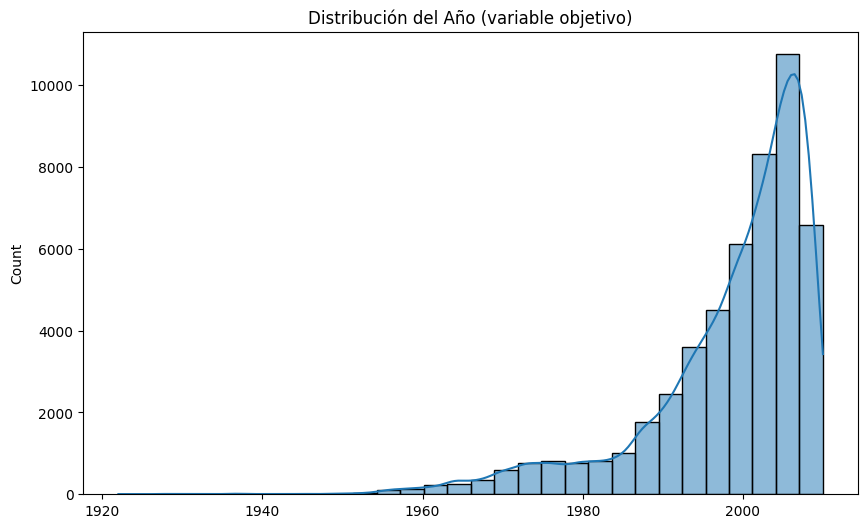

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución del año (variable objetivo)
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribución del Año (variable objetivo)")
plt.show()


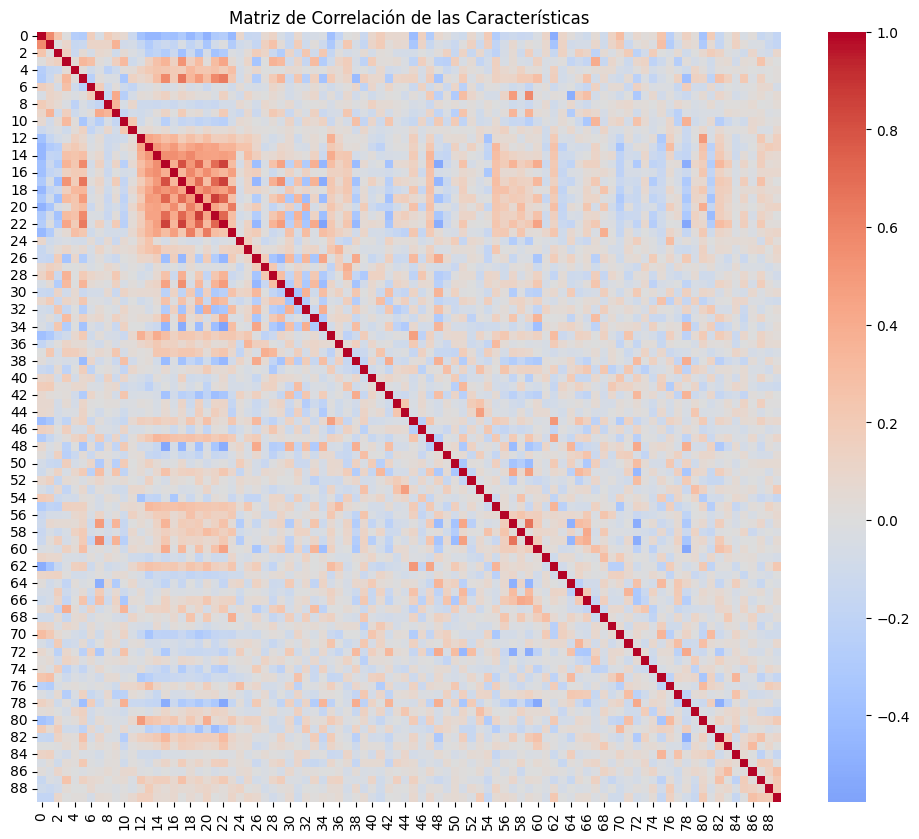

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)

# Calcular la matriz de correlación entre las características
corr_matrix = X_scaled_df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación de las Características")
plt.show()


Debido a que se puede observar claramente que hay características que están muy correlacionadas entre sí,se ha considerado reducir la cantidad de características usando técnicas como el PCA

In [ ]:
varianzas = X_scaled.var(axis=0)
caracteristica_mayor_varianza = varianzas.argmax()
print(f"Característica con mayor varianza: {caracteristica_mayor_varianza} con varianza de {varianzas[caracteristica_mayor_varianza]}")

# Calcular la matriz de correlación
corr_matrix = pd.DataFrame(X_scaled).corr()

# Extraer las correlaciones más altas (excluyendo la diagonal)
corr_unstacked = corr_matrix.unstack()
corr_unstacked = corr_unstacked[corr_unstacked != 1]  # Excluir correlaciones perfectas de una característica consigo misma

# Encontrar el par de características con la correlación positiva más alta
max_corr = corr_unstacked.idxmax()
print(f"Par de características con mayor correlación positiva: {max_corr} con valor de {corr_unstacked[max_corr]}")

# Encontrar el par de características con la correlación negativa más alta
min_corr = corr_unstacked.idxmin()
print(f"Par de características con mayor correlación negativa: {min_corr} con valor de {corr_unstacked[min_corr]}")

# Identificar características con poca correlación (cercanas a 0) con todas las demás
low_corr_features = (corr_matrix.abs().mean() < 0.1).index
low_corr_features = [i for i in low_corr_features if corr_matrix.abs().mean()[i] < 0.1]
print(f"Características con poca correlación con las demás: {low_corr_features}")


Característica con mayor varianza: 55 con varianza de 1.0000000000000004
Par de características con mayor correlación positiva: (19, 21) con valor de 0.8689564422926338
Par de características con mayor correlación negativa: (22, 34) con valor de -0.5763746072724112
Características con poca correlación con las demás: [4, 6, 8, 11, 24, 25, 27, 36, 40, 41, 43, 44, 46, 49, 52, 53, 61, 63, 68, 69, 71, 73, 74, 76, 77, 79, 83, 84, 85, 86, 87, 88, 89]


Num muestras: 35000
Num características (dimensiones): 90

Características con mayor correlación:
Característica 1: Correlación 0.2131
Característica 6: Correlación -0.1751
Característica 3: Correlación -0.1333

Características con menor correlación:
Característica 82: Correlación -0.0024
Característica 4: Correlación 0.0013
Característica 42: Correlación -0.0009


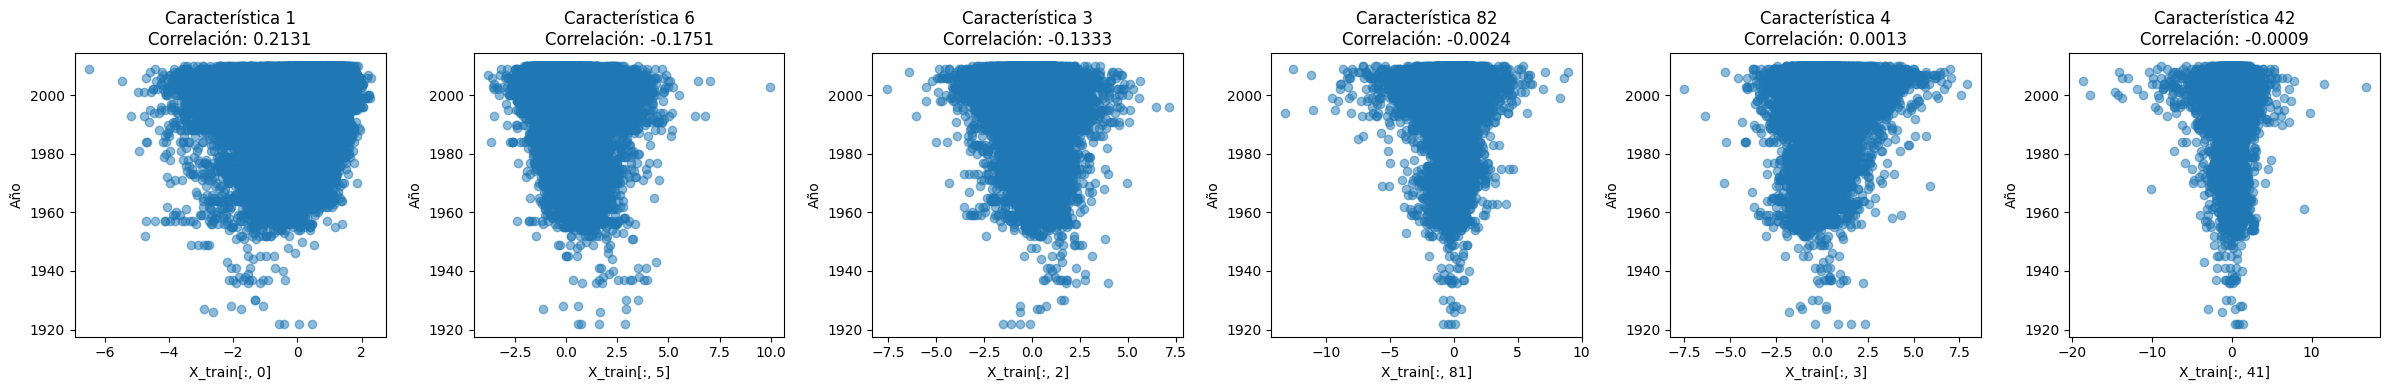

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Número de muestras y características
num_samples, num_features = X_train.shape
print(f"Num muestras: {num_samples}")
print(f"Num características (dimensiones): {num_features}")

# 1. Calcular la correlación de cada característica con la variable objetivo (año)
correlations = []
for i in range(num_features):
    corr = np.corrcoef(X_train[:, i], y_train)[0, 1]
    correlations.append((i, corr))  # Guardamos el índice y la correlación

# Ordenar las correlaciones por valor absoluto de mayor a menor
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

# Seleccionar las 3 características con mayor y menor correlación
top_3 = correlations_sorted[:3]   # Las 3 con mayor correlación (positiva o negativa)
bottom_3 = correlations_sorted[-3:]  # Las 3 con menor correlación

# Imprimir las características seleccionadas
print("\nCaracterísticas con mayor correlación:")
for idx, corr in top_3:
    print(f"Característica {idx+1}: Correlación {corr:.4f}")

print("\nCaracterísticas con menor correlación:")
for idx, corr in bottom_3:
    print(f"Característica {idx+1}: Correlación {corr:.4f}")

# Graficar las 3 características con mayor y menor correlación
selected_features = top_3 + bottom_3

fig, axes = plt.subplots(1, 6, figsize=(24, 4))
for i, (idx, corr) in enumerate(selected_features):
    axes[i].scatter(X_train[:, idx], y_train, alpha=0.5)
    axes[i].set_title(f"Característica {idx+1}\nCorrelación: {corr:.4f}")
    axes[i].set_xlabel(f"X_train[:, {idx}]")
    axes[i].set_ylabel("Año")

plt.tight_layout()
plt.show()


## 1.3 Train several promising models

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def plot_regression(y_val, y_pred):
  # Crear el gráfico de dispersión de las predicciones vs los valores reales
  plt.figure(figsize=(8, 6))
  plt.scatter(y_val, y_pred, alpha=0.5)
  plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', lw=2)  # Línea de identidad (predicción perfecta)
  plt.xlabel('Valores Reales')
  plt.ylabel('Predicciones')
  plt.title('Predicciones vs Valores Reales')
  plt.grid(True)
  plt.show()


def train(model, X_train, y_train, X_val, y_val):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  mse = mean_squared_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)
  medae = median_absolute_error(y_val, y_pred)
  print(f"Median Absolute Error (MedAE): {medae}")
  print(f"Error Cuadrático Medio (MSE): {mse}")
  print(f"Coeficiente de Determinación (R²): {r2}")
  plot_regression(y_val, y_pred)

Median Absolute Error (MedAE): 4.92069091898361
Error Cuadrático Medio (MSE): 85.87554083695228
Coeficiente de Determinación (R²): 0.20988101400504855


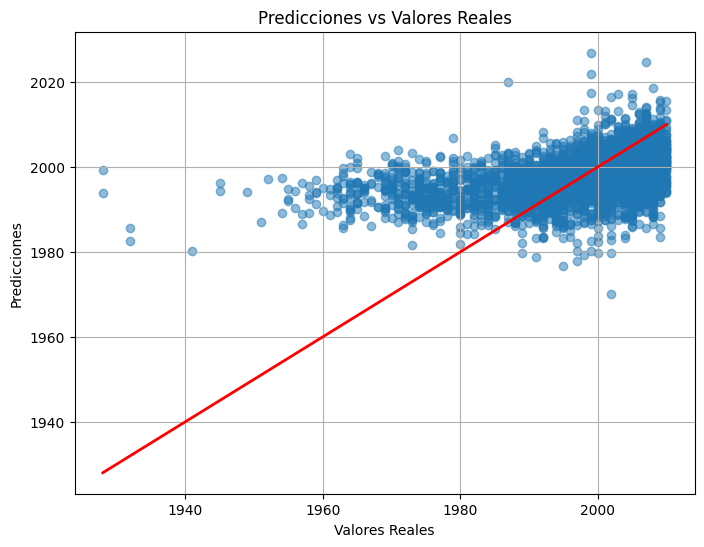

In [ ]:
model_linear = LinearRegression()
train(model_linear, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 4.919949001784744
Error Cuadrático Medio (MSE): 85.8753618282786
Coeficiente de Determinación (R²): 0.20988266101827668


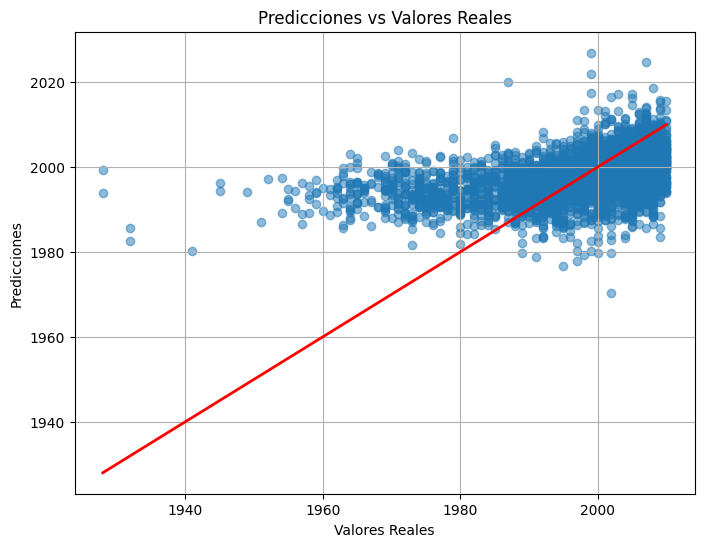

In [ ]:
from sklearn.linear_model import Ridge

# Entrenar un modelo Ridge con regularización
ridge_model = Ridge(alpha=350.0)
train(ridge_model, X_train, y_train, X_val, y_val)


Median Absolute Error (MedAE): 4.839999999999918
Error Cuadrático Medio (MSE): 79.45057208000003
Coeficiente de Determinación (R²): 0.2689955156409781


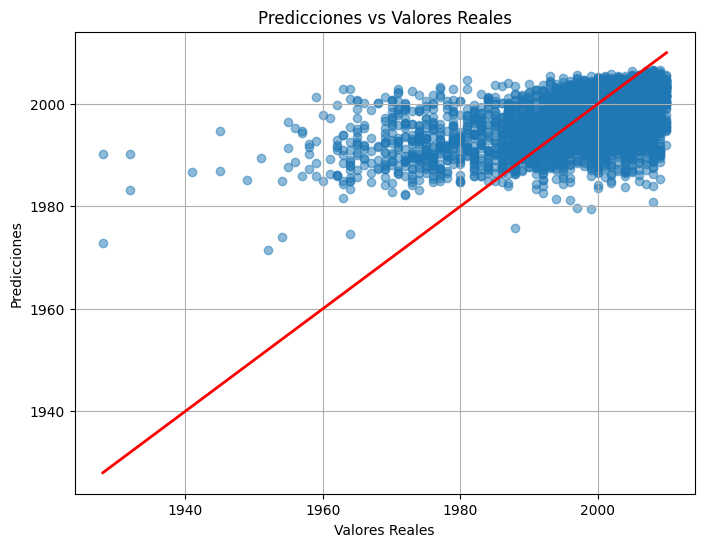

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
train(rf_model, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 4.226604868210302
Error Cuadrático Medio (MSE): 90.04326788884904
Coeficiente de Determinación (R²): 0.17153481856855446


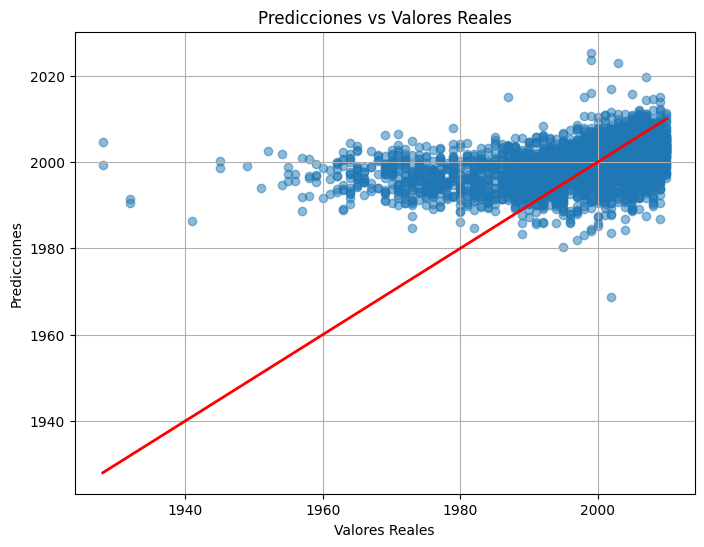

In [23]:
from sklearn.linear_model import HuberRegressor

huber_model = HuberRegressor()
train(huber_model, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 21.1394366869514
Error Cuadrático Medio (MSE): 1977.892112825748
Coeficiente de Determinación (R²): -17.198081728072584


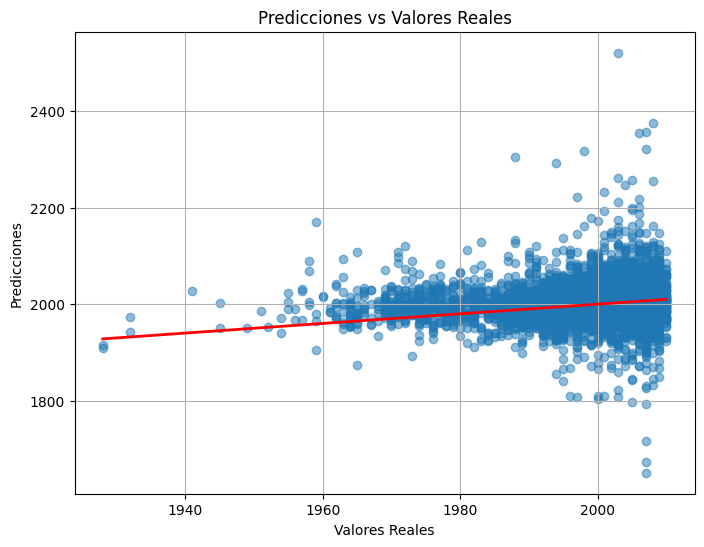

In [ ]:
from sklearn.linear_model import RANSACRegressor

# Entrenar un modelo de regresión robusta con RANSAC
ransac_model = RANSACRegressor()
train(ransac_model, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 4.918761516652694
Error Cuadrático Medio (MSE): 85.87497800051354
Coeficiente de Determinación (R²): 0.20988619251981444


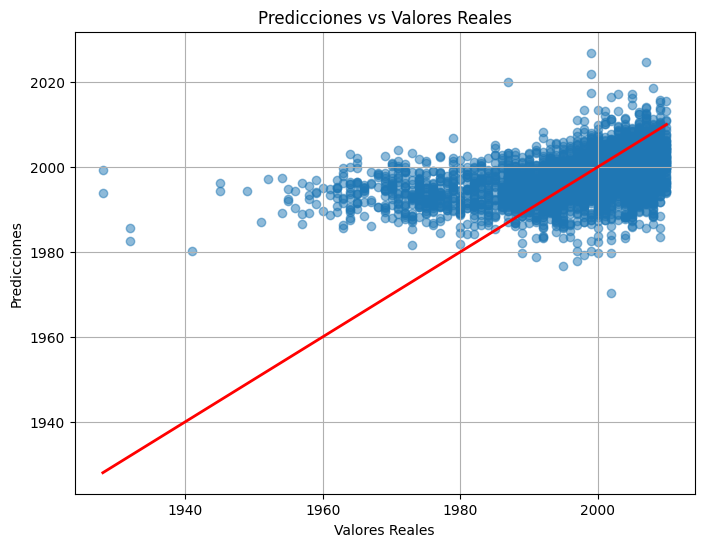

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.005)
train(model, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 4.886594254275678
Error Cuadrático Medio (MSE): 86.70229138993935
Coeficiente de Determinación (R²): 0.20227429267053987


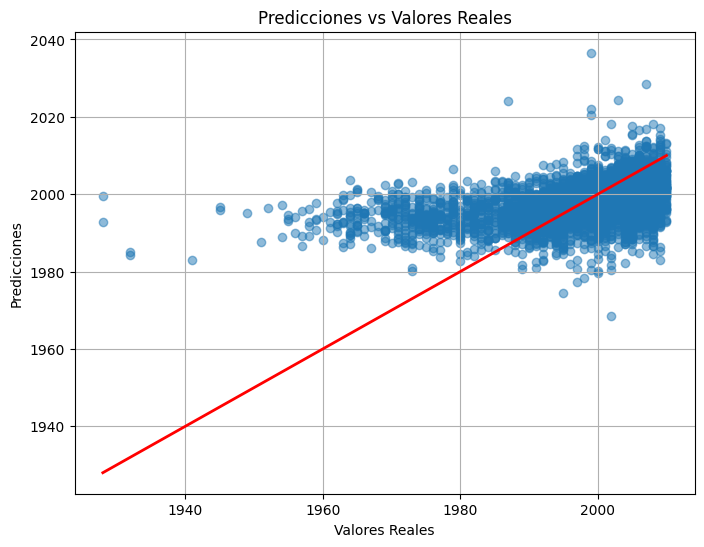

In [27]:
from sklearn.linear_model import SGDRegressor

# Entrenar un modelo de regresión con Descenso de Gradiente Estocástico
sgd_model = SGDRegressor(max_iter=2000, tol=1e-3)
train(sgd_model, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 6.0
Error Cuadrático Medio (MSE): 176.8436
Coeficiente de Determinación (R²): -0.627092936474084


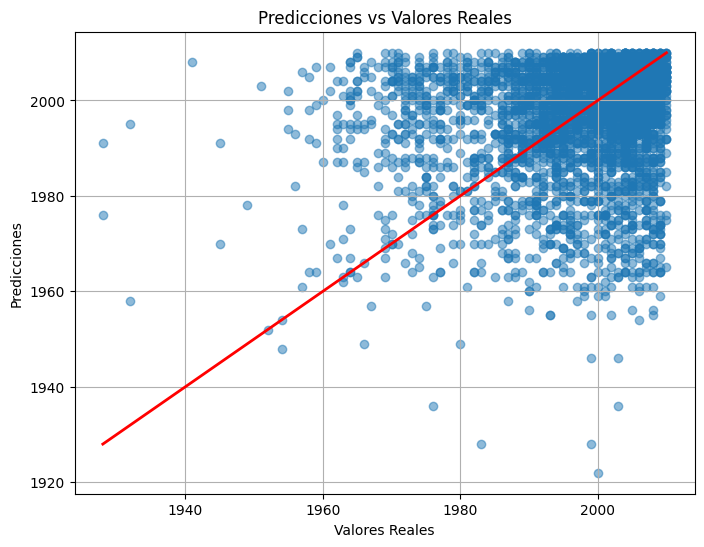

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
train(tree_model, X_train, y_train, X_val, y_val)


In [ ]:
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
train(best_model, X_train, y_train, X_val, y_val)

##PCA

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalizar los datos (escalar los valores de píxeles de 0-255 a un rango de 0-1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Aplicar PCA
# Según cantidad de varianza explicada (95%)
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_scaled)

# Mostrar la cantidad de componentes principales seleccionados
print(f"Componentes principales seleccionados: {pca.n_components_}")

Componentes principales seleccionados: 67


In [4]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y test (80% entrenamiento, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Segundo paso: dividir el conjunto de entrenamiento en entrenamiento y validación (90% de entrenamiento, 10% de validación)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)  # 0.125 * 0.8 = 0.1 del total

### 1.3.2 Train several promising models (PCA)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def plot_regression(y_val, y_pred):
  # Crear el gráfico de dispersión de las predicciones vs los valores reales
  plt.figure(figsize=(8, 6))
  plt.scatter(y_val, y_pred, alpha=0.5)
  plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', lw=2)  # Línea de identidad (predicción perfecta)
  plt.xlabel('Valores Reales')
  plt.ylabel('Predicciones')
  plt.title('Predicciones vs Valores Reales')
  plt.grid(True)
  plt.show()


def train(model, X_train, y_train, X_val, y_val):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  mse = mean_squared_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)
  medae = median_absolute_error(y_val, y_pred)

  print(f"Median Absolute Error (MedAE): {medae}")
  print(f"Error Cuadrático Medio (MSE): {mse}")
  print(f"Coeficiente de Determinación (R²): {r2}")
  plot_regression(y_val, y_pred)

Median Absolute Error (MedAE): 5.4187655883237085
Error Cuadrático Medio (MSE): 92.01316303473419
Coeficiente de Determinación (R²): 0.1534103148971504


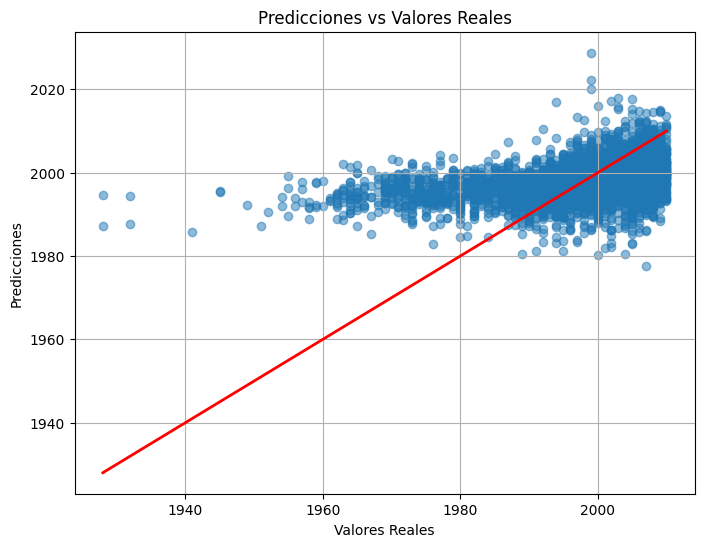

In [12]:
model = LinearRegression()
train(model, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 5.418445438216622
Error Cuadrático Medio (MSE): 91.96244019776053
Coeficiente de Determinación (R²): 0.15387700280532324


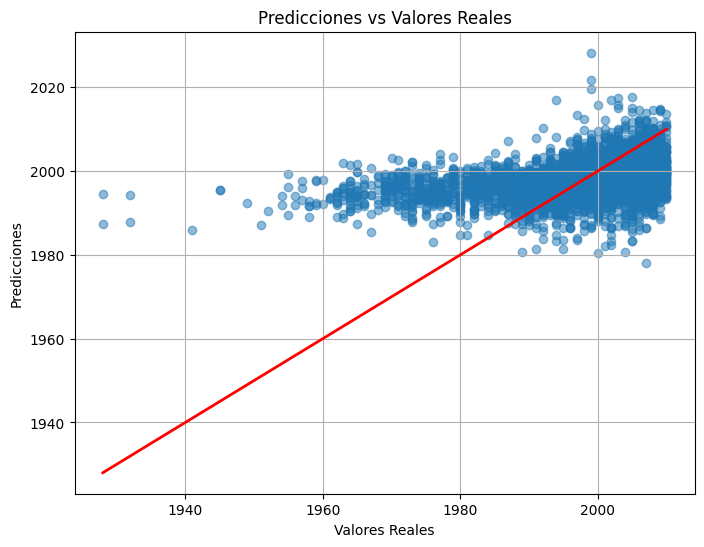

In [13]:
from sklearn.linear_model import Ridge

# Entrenar un modelo Ridge con regularización
ridge_model = Ridge(alpha=350.0)
train(ridge_model, X_train, y_train, X_val, y_val)


Median Absolute Error (MedAE): 5.460000000000036
Error Cuadrático Medio (MSE): 88.34746002000003
Coeficiente de Determinación (R²): 0.18713751499082476


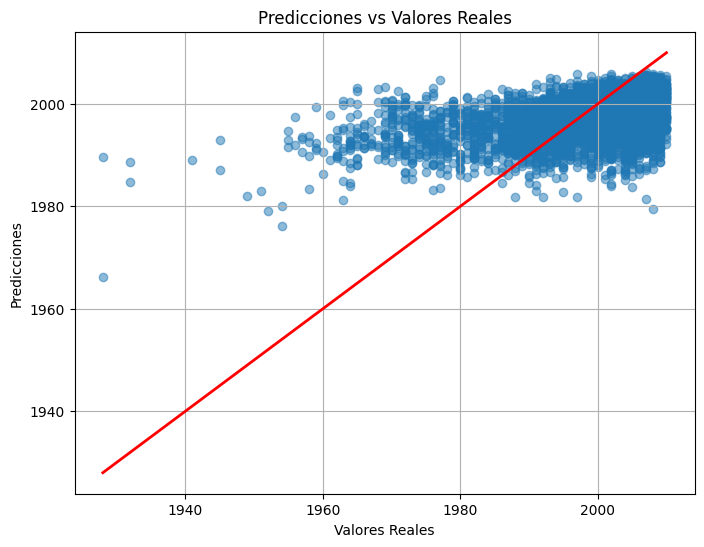

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
train(rf_model, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 4.548667246702394
Error Cuadrático Medio (MSE): 96.95815542774626
Coeficiente de Determinación (R²): 0.10791269896087663


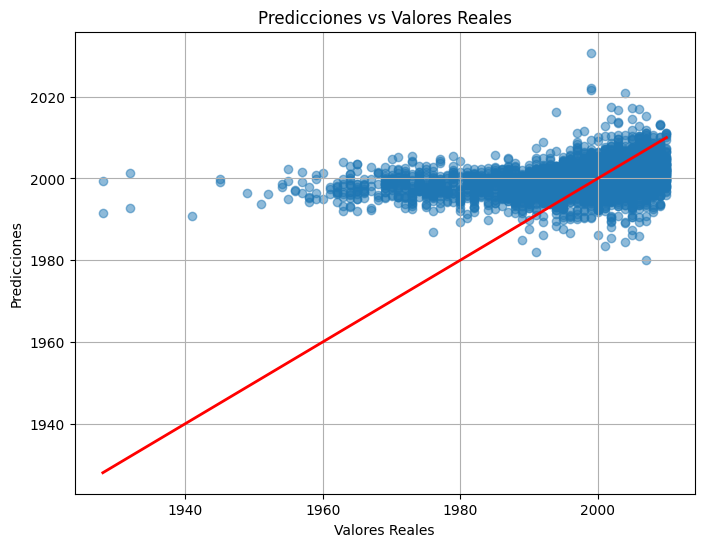

In [14]:
from sklearn.linear_model import HuberRegressor5
huber_model = HuberRegressor()
train(huber_model, X_train, y_train, X_val, y_val)


Median Absolute Error (MedAE): 18.522814993230554
Error Cuadrático Medio (MSE): 1501.1946133255824
Coeficiente de Determinación (R²): -12.812109409755282


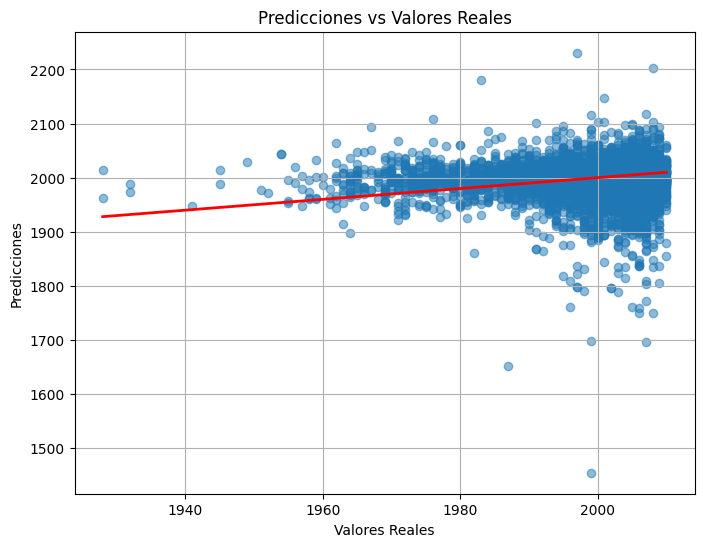

In [15]:
from sklearn.linear_model import RANSACRegressor

# Entrenar un modelo de regresión robusta con RANSAC
ransac_model = RANSACRegressor()
train(ransac_model, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 5.405112134441424
Error Cuadrático Medio (MSE): 91.98586369990025
Coeficiente de Determinación (R²): 0.15366148912612299


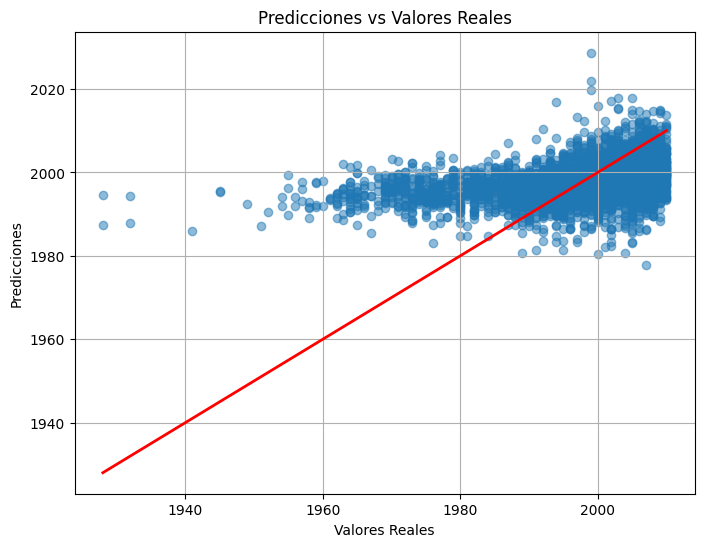

In [16]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.005)
train(model, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 5.473061623137596
Error Cuadrático Medio (MSE): 93.70441388802689
Coeficiente de Determinación (R²): 0.1378495464147268


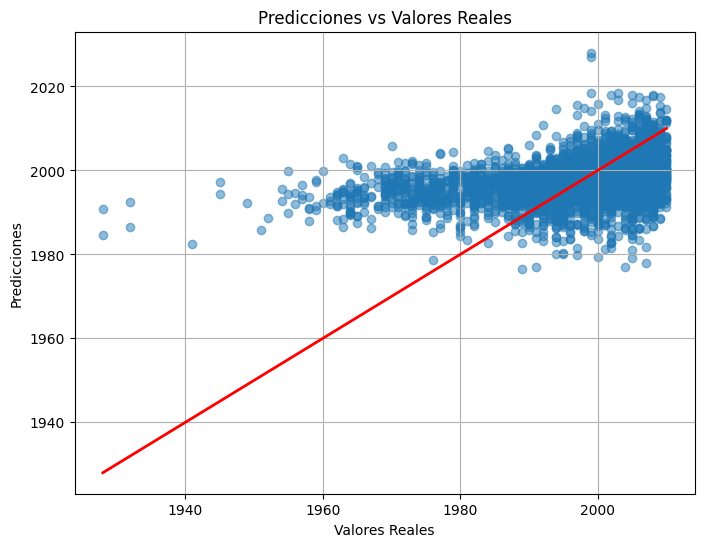

In [17]:
from sklearn.linear_model import SGDRegressor

# Entrenar un modelo de regresión con Descenso de Gradiente Estocástico
sgd_model = SGDRegressor(max_iter=2000, tol=1e-3)
train(sgd_model, X_train, y_train, X_val, y_val)

Median Absolute Error (MedAE): 6.0
Error Cuadrático Medio (MSE): 193.2958
Coeficiente de Determinación (R²): -0.7784654396885569


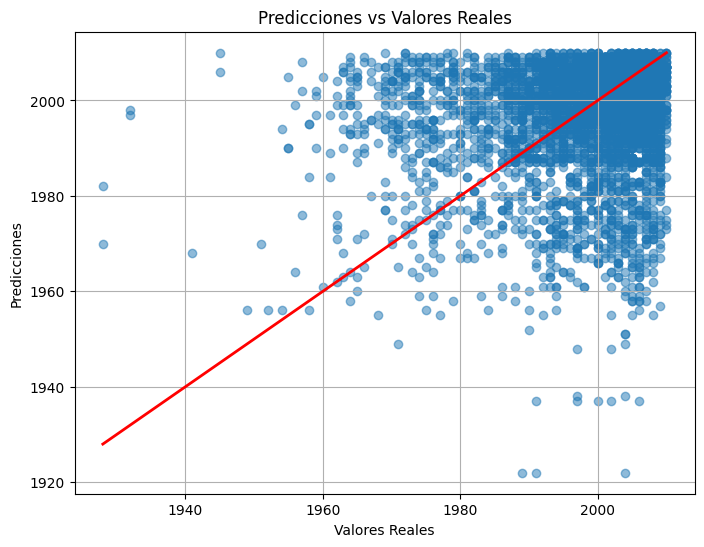

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
train(tree_model, X_train, y_train, X_val, y_val)


In [ ]:
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
train(best_model, X_train, y_train, X_val, y_val)

## Test

Hemos elegido el modelo el modelo con menos MSE sin utilizar PCA:

Median Absolute Error (MedAE): 4.185710358656593
Error Cuadrático Medio (MSE): 90.00490885121569
Coeficiente de Determinación (R²): 0.18290998244758883


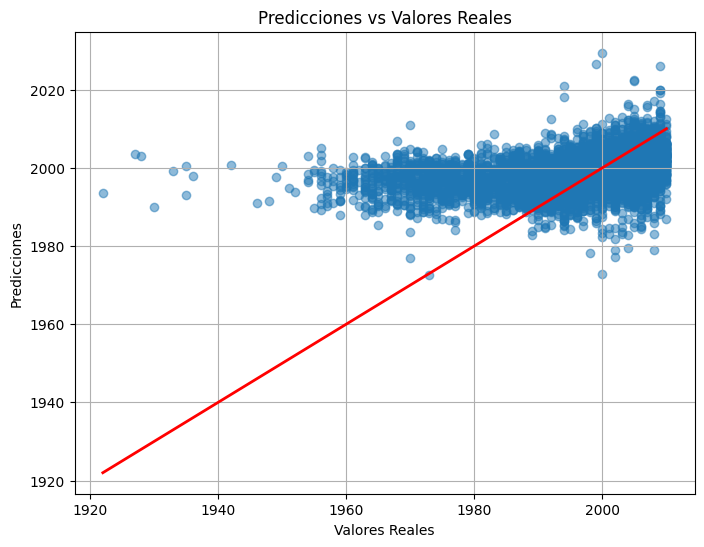

In [26]:
y_pred = huber_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"Median Absolute Error (MedAE): {medae}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")
plot_regression(y_test, y_pred)